In [16]:
import csv
import json
import re
import datetime

from cleantext import clean

import matplotlib
import matplotlib.pyplot as plt

In [17]:
matplotlib.rcParams['figure.figsize'] = (20,10)
matplotlib.rcParams.update({'font.size': 18})

In [18]:
# SAMPLE
csv_in = 'news_sample.csv'

Process and store the stuff

In [19]:
with open(csv_in, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    headers = next(reader, None)
    data = []
    for row in reader:
        obj = {}
        for header, value in zip(headers, row):
            obj[header] = value
        data.append(obj)
data[0]

{'': '0',
 'meta_description': 'THE UNIVERSE ceases to exist when we are not looking at it proving that life is an illusion, according to one study.',
 'updated_at': '2018-02-02 01:19:41.756664',
 'content': 'life is an illusion , at least on a quantum level , in a theory which has recently been confirmed by a set of researchers . they finally have the means to test john wheeler s delayed - choice theory and concluded that the physicist was right . in <number> , mr wheeler s proposed experiment involved a moving object that was given the choice to act like a wave or a particle the former acting as a vibration with a frequency that can distinguish it from other waves and the latter having no frequency that you can determine its position in space , unlike a wave and at what point does it decide to act like one or the other . at the time , the technology was not available to conduct a strong experiment , but scientists have now been able to carry it out .',
 'authors': 'Sean Martin',
 'sc

In [20]:
def custom_clean(content):
    return clean(content.lower(), lower=False,
                 no_line_breaks=True,
                 no_urls=True, no_numbers=True,
                 replace_with_number='<NUM>',)

orig_text = data[1]['content']
cleaned_text = custom_clean(orig_text)
print(cleaned_text)

unfortunately , he hasn t yet attacked her for islamic terrorism - connections , but we know he will . below are several links that explain in detail why having huma abedin anywhere near the white house would be like inviting in the terrorism - linked muslim brotherhood , which has been banned in egypt and the uae . bni readers , please forward the damning [ ]


In [21]:
def strip_and_tokenize(text):
    text = re.sub(r'''([!@#$%^&*(),\.?:{}|;\[\]\{\}=´'"])''', r' \1 ', text)
    text = re.sub(r'[\n\t\r]', ' ', text)
    text = re.sub(r'[ ]+', ' ', text)
    return text.split(' ')

tokenized_text = strip_and_tokenize(cleaned_text)
print(tokenized_text)

['unfortunately', ',', 'he', 'hasn', 't', 'yet', 'attacked', 'her', 'for', 'islamic', 'terrorism', '-', 'connections', ',', 'but', 'we', 'know', 'he', 'will', '.', 'below', 'are', 'several', 'links', 'that', 'explain', 'in', 'detail', 'why', 'having', 'huma', 'abedin', 'anywhere', 'near', 'the', 'white', 'house', 'would', 'be', 'like', 'inviting', 'in', 'the', 'terrorism', '-', 'linked', 'muslim', 'brotherhood', ',', 'which', 'has', 'been', 'banned', 'in', 'egypt', 'and', 'the', 'uae', '.', 'bni', 'readers', ',', 'please', 'forward', 'the', 'damning', '[', ']', '']


In [ ]:
token_count = {}
for article in data:
    content = article['content']
    tokenized = strip_and_tokenize(custom_clean(content))
    for token in tokenized:
        if token in token_count:
            token_count[token] += 1
        else:
            token_count[token] = 1

In [12]:
token_count

{'sometimes': 17,
 'the': 9493,
 'power': 126,
 'of': 4965,
 'christmas': 16,
 'will': 487,
 'make': 167,
 'you': 1239,
 'do': 320,
 'wild': 5,
 'and': 4702,
 'wonderful': 13,
 'things': 158,
 '.': 9148,
 'not': 737,
 'need': 126,
 'to': 4891,
 'believe': 55,
 'in': 3112,
 'holy': 10,
 'trinity': 1,
 'positive': 30,
 'doing': 42,
 'good': 133,
 'for': 1554,
 'others': 80,
 'simple': 20,
 'act': 69,
 'giving': 17,
 'without': 86,
 'receiving': 11,
 'is': 2317,
 'lost': 24,
 'on': 1163,
 'many': 227,
 'us': 283,
 'these': 349,
 'days': 62,
 ',': 8694,
 'as': 1089,
 'worries': 3,
 'about': 463,
 'money': 117,
 'success': 25,
 'hold': 27,
 'back': 126,
 'from': 709,
 'who': 424,
 'are': 1233,
 'one': 441,
 'congregation': 6,
 'ohio': 7,
 'was': 786,
 'moved': 13,
 'action': 62,
 'by': 839,
 'a': 3389,
 'sermon': 8,
 'given': 75,
 'at': 707,
 'their': 515,
 'church': 14,
 'eve': 5,
 'pastor': 4,
 'grand': 6,
 'lake': 2,
 'united': 80,
 'methodist': 1,
 'celina': 1,
 'gave': 30,
 'an': 520,


In [13]:
print(f'Number of URLs = {token_count["<URL>"]}')
print(f'Number of NUMs = {token_count["<NUM>"]}')

Number of URLs = 243
Number of NUMs = 2073


In [14]:
word_freq_sorted = sorted(token_count.items(), key = lambda key: -key[1])
symbols = [char for char in '''!@#$%^&*(),\.?:{}|;\[\]\{\}=´'"'''] + ["<NUM>", "<URL"]
word_freq_sorted = list(filter(lambda word: word[0] not in symbols, word_freq_sorted))
word_freq_sorted[:100]

[('the', 9493),
 ('of', 4965),
 ('to', 4891),
 ('and', 4702),
 ('a', 3389),
 ('in', 3112),
 ('is', 2317),
 ('that', 2296),
 ('s', 1753),
 ('it', 1636),
 ('for', 1554),
 ('you', 1239),
 ('are', 1233),
 ('on', 1163),
 ('with', 1160),
 ('this', 1155),
 ('as', 1089),
 ('i', 1020),
 ('be', 926),
 ('by', 839),
 ('have', 788),
 ('was', 786),
 ('not', 737),
 ('from', 709),
 ('at', 707),
 ('or', 687),
 ('we', 685),
 ('they', 643),
 ('but', 593),
 ('your', 555),
 ('has', 543),
 ('an', 520),
 ('their', 515),
 ('all', 495),
 ('will', 487),
 ('can', 481),
 ('more', 473),
 ('about', 463),
 ('what', 454),
 ('he', 451),
 ('if', 449),
 ('one', 441),
 ('t', 435),
 ('there', 425),
 ('who', 424),
 ('so', 388),
 ('which', 388),
 ('people', 386),
 ('–', 364),
 ('our', 362),
 ('were', 358),
 ('his', 357),
 ('these', 349),
 ('been', 347),
 ('trump', 345),
 ('no', 341),
 ('like', 328),
 ('would', 323),
 ('do', 320),
 ('its', 307),
 ('when', 305),
 ('time', 302),
 ('us', 283),
 ('some', 281),
 ('also', 276),
 (

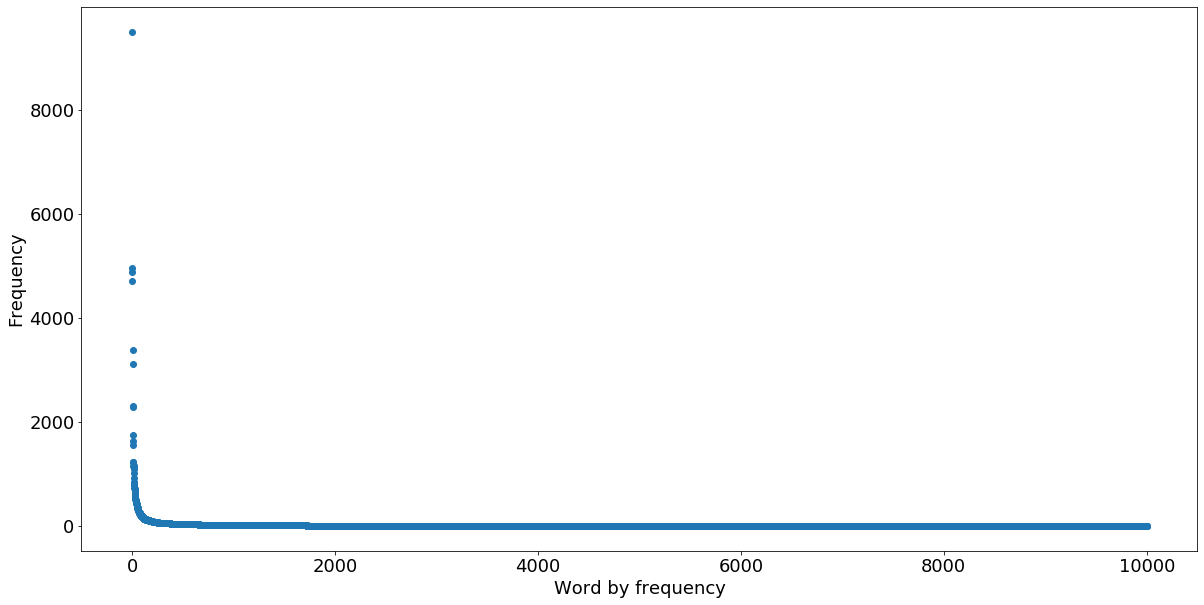

In [15]:
freq_count = [tuple_freq[1] for tuple_freq in word_freq_sorted]
x = range(1, 10001)
y = freq_count[:10000]

plt.scatter(x, y)
plt.xlabel('Word by frequency')
plt.ylabel('Frequency')
plt.show()